In [1]:
%matplotlib inline

from __future__ import print_function, division
import numpy as np
import sys, os
from astropy.table import Table
from astropy.io import fits
import fitsio
import matplotlib.pyplot as plt

In [2]:
cat = fitsio.read('/Users/roz18/Downloads/COSMOS2015_Laigle+_v1.1.fits.gz')
print(len(cat))

1182108


In [4]:
' '.join(cat.dtype.names)

'ALPHA_J2000 DELTA_J2000 NUMBER X_IMAGE Y_IMAGE ERRX2_IMAGE ERRY2_IMAGE ERRXY_IMAGE FLAG_HJMCC FLUX_RADIUS KRON_RADIUS EBV FLAG_PETER FLAG_COSMOS FLAG_DEEP FLAG_SHALLOW Ks_FLUX_APER2 Ks_FLUXERR_APER2 Ks_FLUX_APER3 Ks_FLUXERR_APER3 Ks_MAG_APER2 Ks_MAGERR_APER2 Ks_MAG_APER3 Ks_MAGERR_APER3 Ks_MAG_AUTO Ks_MAGERR_AUTO Ks_MAG_ISO Ks_MAGERR_ISO Ks_FLAGS Ks_IMAFLAGS_ISO Y_FLUX_APER2 Y_FLUXERR_APER2 Y_FLUX_APER3 Y_FLUXERR_APER3 Y_MAG_APER2 Y_MAGERR_APER2 Y_MAG_APER3 Y_MAGERR_APER3 Y_MAG_AUTO Y_MAGERR_AUTO Y_MAG_ISO Y_MAGERR_ISO Y_FLAGS Y_IMAFLAGS_ISO H_FLUX_APER2 H_FLUXERR_APER2 H_FLUX_APER3 H_FLUXERR_APER3 H_MAG_APER2 H_MAGERR_APER2 H_MAG_APER3 H_MAGERR_APER3 H_MAG_AUTO H_MAGERR_AUTO H_MAG_ISO H_MAGERR_ISO H_FLAGS H_IMAFLAGS_ISO J_FLUX_APER2 J_FLUXERR_APER2 J_FLUX_APER3 J_FLUXERR_APER3 J_MAG_APER2 J_MAGERR_APER2 J_MAG_APER3 J_MAGERR_APER3 J_MAG_AUTO J_MAGERR_AUTO J_MAG_ISO J_MAGERR_ISO J_FLAGS J_IMAFLAGS_ISO B_FLUX_APER2 B_FLUXERR_APER2 B_FLUX_APER3 B_FLUXERR_APER3 B_MAG_APER2 B_MAGERR_APER2 

In [3]:
cat1 = Table(cat[:30])
cat1

ALPHA_J2000,DELTA_J2000,NUMBER,X_IMAGE,Y_IMAGE,ERRX2_IMAGE,ERRY2_IMAGE,ERRXY_IMAGE,FLAG_HJMCC,FLUX_RADIUS,KRON_RADIUS,EBV,FLAG_PETER,FLAG_COSMOS,FLAG_DEEP,FLAG_SHALLOW,Ks_FLUX_APER2,Ks_FLUXERR_APER2,Ks_FLUX_APER3,Ks_FLUXERR_APER3,Ks_MAG_APER2,Ks_MAGERR_APER2,Ks_MAG_APER3,Ks_MAGERR_APER3,Ks_MAG_AUTO,Ks_MAGERR_AUTO,Ks_MAG_ISO,Ks_MAGERR_ISO,Ks_FLAGS,Ks_IMAFLAGS_ISO,Y_FLUX_APER2,Y_FLUXERR_APER2,Y_FLUX_APER3,Y_FLUXERR_APER3,Y_MAG_APER2,Y_MAGERR_APER2,Y_MAG_APER3,Y_MAGERR_APER3,Y_MAG_AUTO,Y_MAGERR_AUTO,Y_MAG_ISO,Y_MAGERR_ISO,Y_FLAGS,Y_IMAFLAGS_ISO,H_FLUX_APER2,H_FLUXERR_APER2,H_FLUX_APER3,H_FLUXERR_APER3,H_MAG_APER2,H_MAGERR_APER2,H_MAG_APER3,H_MAGERR_APER3,H_MAG_AUTO,H_MAGERR_AUTO,H_MAG_ISO,H_MAGERR_ISO,H_FLAGS,H_IMAFLAGS_ISO,J_FLUX_APER2,J_FLUXERR_APER2,J_FLUX_APER3,J_FLUXERR_APER3,J_MAG_APER2,J_MAGERR_APER2,J_MAG_APER3,J_MAGERR_APER3,J_MAG_AUTO,J_MAGERR_AUTO,J_MAG_ISO,J_MAGERR_ISO,J_FLAGS,J_IMAFLAGS_ISO,B_FLUX_APER2,B_FLUXERR_APER2,B_FLUX_APER3,B_FLUXERR_APER3,B_MAG_APER2,B_MAGERR_APER2,B_MAG_APER3,B_MAGERR_APER3,B_MAG_AUTO,B_MAGERR_AUTO,B_MAG_ISO,B_MAGERR_ISO,B_FLAGS,B_IMAFLAGS_ISO,V_FLUX_APER2,V_FLUXERR_APER2,V_FLUX_APER3,V_FLUXERR_APER3,V_MAG_APER2,V_MAGERR_APER2,V_MAG_APER3,V_MAGERR_APER3,V_MAG_AUTO,V_MAGERR_AUTO,V_MAG_ISO,V_MAGERR_ISO,V_FLAGS,V_IMAFLAGS_ISO,ip_FLUX_APER2,ip_FLUXERR_APER2,ip_FLUX_APER3,ip_FLUXERR_APER3,ip_MAG_APER2,ip_MAGERR_APER2,ip_MAG_APER3,ip_MAGERR_APER3,ip_MAG_AUTO,ip_MAGERR_AUTO,ip_MAG_ISO,ip_MAGERR_ISO,ip_FLAGS,ip_IMAFLAGS_ISO,r_FLUX_APER2,r_FLUXERR_APER2,r_FLUX_APER3,r_FLUXERR_APER3,r_MAG_APER2,r_MAGERR_APER2,r_MAG_APER3,r_MAGERR_APER3,r_MAG_AUTO,r_MAGERR_AUTO,r_MAG_ISO,r_MAGERR_ISO,r_FLAGS,r_IMAFLAGS_ISO,u_FLUX_APER2,u_FLUXERR_APER2,u_FLUX_APER3,u_FLUXERR_APER3,u_MAG_APER2,u_MAGERR_APER2,u_MAG_APER3,u_MAGERR_APER3,u_MAG_AUTO,u_MAGERR_AUTO,u_MAG_ISO,u_MAGERR_ISO,u_FLAGS,u_IMAFLAGS_ISO,zp_FLUX_APER2,zp_FLUXERR_APER2,zp_FLUX_APER3,zp_FLUXERR_APER3,zp_MAG_APER2,zp_MAGERR_APER2,zp_MAG_APER3,zp_MAGERR_APER3,zp_MAG_AUTO,zp_MAGERR_AUTO,zp_MAG_ISO,zp_MAGERR_ISO,zp_FLAGS,zp_IMAFLAGS_ISO,zpp_FLUX_APER2,zpp_FLUXERR_APER2,zpp_FLUX_APER3,zpp_FLUXERR_APER3,zpp_MAG_APER2,zpp_MAGERR_APER2,zpp_MAG_APER3,zpp_MAGERR_APER3,zpp_MAG_AUTO,zpp_MAGERR_AUTO,zpp_MAG_ISO,zpp_MAGERR_ISO,zpp_FLAGS,zpp_IMAFLAGS_ISO,IA484_FLUX_APER2,IA484_FLUXERR_APER2,IA484_FLUX_APER3,IA484_FLUXERR_APER3,IA484_MAG_APER2,IA484_MAGERR_APER2,IA484_MAG_APER3,IA484_MAGERR_APER3,IA484_MAG_AUTO,IA484_MAGERR_AUTO,IA484_MAG_ISO,IA484_MAGERR_ISO,IA484_FLAGS,IA484_IMAFLAGS_ISO,IA527_FLUX_APER2,IA527_FLUXERR_APER2,IA527_FLUX_APER3,IA527_FLUXERR_APER3,IA527_MAG_APER2,IA527_MAGERR_APER2,IA527_MAG_APER3,IA527_MAGERR_APER3,IA527_MAG_AUTO,IA527_MAGERR_AUTO,IA527_MAG_ISO,IA527_MAGERR_ISO,IA527_FLAGS,IA527_IMAFLAGS_ISO,IA624_FLUX_APER2,IA624_FLUXERR_APER2,IA624_FLUX_APER3,IA624_FLUXERR_APER3,IA624_MAG_APER2,IA624_MAGERR_APER2,IA624_MAG_APER3,IA624_MAGERR_APER3,IA624_MAG_AUTO,IA624_MAGERR_AUTO,IA624_MAG_ISO,IA624_MAGERR_ISO,IA624_FLAGS,IA624_IMAFLAGS_ISO,IA679_FLUX_APER2,IA679_FLUXERR_APER2,IA679_FLUX_APER3,IA679_FLUXERR_APER3,IA679_MAG_APER2,IA679_MAGERR_APER2,IA679_MAG_APER3,IA679_MAGERR_APER3,IA679_MAG_AUTO,IA679_MAGERR_AUTO,IA679_MAG_ISO,IA679_MAGERR_ISO,IA679_FLAGS,IA679_IMAFLAGS_ISO,IA738_FLUX_APER2,IA738_FLUXERR_APER2,IA738_FLUX_APER3,IA738_FLUXERR_APER3,IA738_MAG_APER2,IA738_MAGERR_APER2,IA738_MAG_APER3,IA738_MAGERR_APER3,IA738_MAG_AUTO,IA738_MAGERR_AUTO,IA738_MAG_ISO,IA738_MAGERR_ISO,IA738_FLAGS,IA738_IMAFLAGS_ISO,IA767_FLUX_APER2,IA767_FLUXERR_APER2,IA767_FLUX_APER3,IA767_FLUXERR_APER3,IA767_MAG_APER2,IA767_MAGERR_APER2,IA767_MAG_APER3,IA767_MAGERR_APER3,IA767_MAG_AUTO,IA767_MAGERR_AUTO,IA767_MAG_ISO,IA767_MAGERR_ISO,IA767_FLAGS,IA767_IMAFLAGS_ISO,IB427_FLUX_APER2,IB427_FLUXERR_APER2,IB427_FLUX_APER3,IB427_FLUXERR_APER3,IB427_MAG_APER2,IB427_MAGERR_APER2,IB427_MAG_APER3,IB427_MAGERR_APER3,IB427_MAG_AUTO,IB427_MAGERR_AUTO,IB427_MAG_ISO,IB427_MAGERR_ISO,IB427_FLAGS,IB427_IMAFLAGS_ISO,IB464_FLUX_APER2,IB464_FLUXERR_APER2,IB464_FLUX_APER3,IB464_FLUXERR_APER3,IB

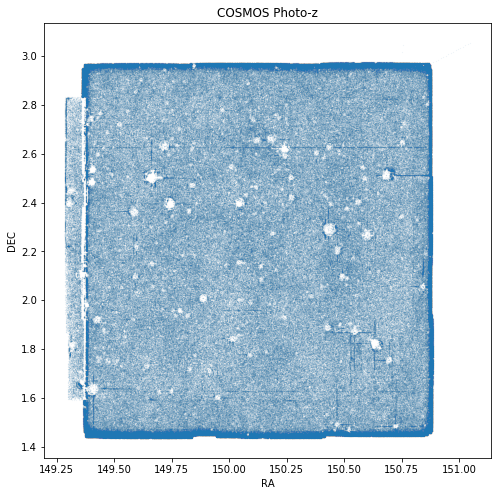

In [6]:
plt.figure(figsize=(8, 8))
plt.plot(cat['ALPHA_J2000'], cat['DELTA_J2000'], '.', markersize=0.1, alpha=0.5)
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('COSMOS Photo-z')
plt.show()

__Check for duplicates__

In [7]:
from __future__ import division, print_function
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
import sys, os
home = os.path.expanduser("~")+'/'
sys.path.append(home+'git/Python/user_modules/')
import match_coord

74532 objects with a nearby neighbor


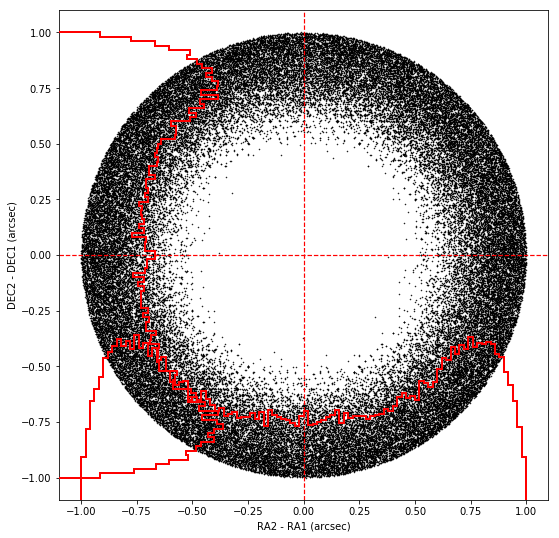

74532 6.31%


In [11]:
n_duplicates, idx1, idx2 = match_coord.match_self(cat['ALPHA_J2000'], cat['DELTA_J2000'], search_radius=1., 
                                                  return_indices=True, plot_q=True)
print(n_duplicates, '{:.2f}%'.format(n_duplicates/len(cat)*100))

1022 objects with a nearby neighbor


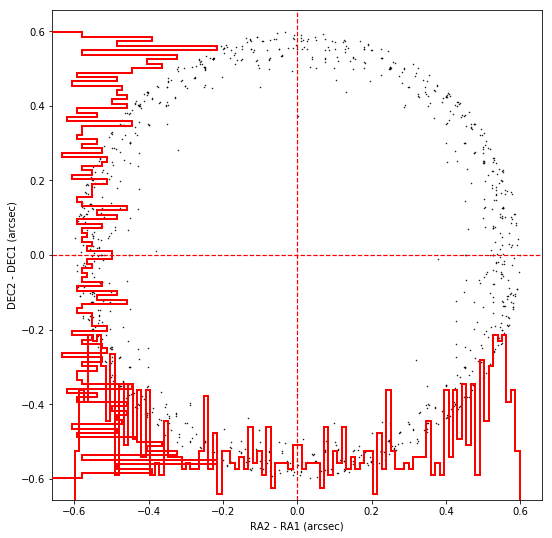

1022 0.09%


In [16]:
n_duplicates, idx1, idx2 = match_coord.match_self(cat['ALPHA_J2000'], cat['DELTA_J2000'], search_radius=0.6, 
                                                  return_indices=True, plot_q=True)
print(n_duplicates, '{:.2f}%'.format(n_duplicates/len(cat)*100))

---------

__Current quality cuts__

In [60]:
mask = np.ones(len(cat), dtype=bool)

mask1 = (cat['FLAG_PETER']==0)
print(np.sum(mask1)/np.sum(mask)*100)
mask = np.copy(mask1)

mask1 &= (cat['TYPE']==0)
print(np.sum(mask1)/np.sum(mask)*100)
mask = np.copy(mask1)

mask1 &= (cat['ZPDF']>0.006) & (cat['ZPDF']<3)
print(np.sum(mask1)/np.sum(mask)*100)
mask = np.copy(mask1)

mask1 &= ((cat['ZPDF_H68']-cat['ZPDF_L68'])/(1+cat['ZPDF'])<0.03)
print(np.sum(mask1)/np.sum(mask)*100)
mask = np.copy(mask1)

mask1 &= (cat['CHI2_BEST']<cat['CHIS']) & (cat['CHI2_BEST']/cat['NBFILT']<5)
print(np.sum(mask1)/np.sum(mask)*100)
mask = np.copy(mask1)

mask1 &= (cat['ZP_2']<0)
print(np.sum(mask1)/np.sum(mask)*100)
mask = np.copy(mask1)

mask1 &= (cat['MASS_MED']>7.5)
print(np.sum(mask1)/np.sum(mask)*100)
mask = np.copy(mask1)

print()
print(np.sum(mask)/len(cat)*100)

66.6868001908455
96.97098857048623
87.5336197333445
16.113340357326997
98.58746058245224
99.82690010066135
97.59784380801598

8.760959235535163


/Users/roz18/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide


In [59]:
mask = (cat['FLAG_PETER']==0) & (cat['TYPE']==0) & (cat['ZPDF']>0.006) & (cat['ZPDF']<3) \
& ((cat['ZPDF_H68']-cat['ZPDF_L68'])/(1+cat['ZPDF'])<0.03) &  (cat['CHI2_BEST']<cat['CHIS']) & (cat['CHI2_BEST']/cat['NBFILT']<5) \
& (cat['ZP_2']<0) & (cat['MASS_MED']>7.5)

print(np.sum(mask)/len(cat)*100)

8.760959235535163


/Users/roz18/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


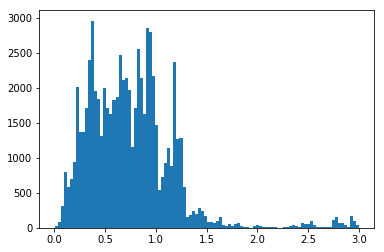

In [62]:
plt.hist(cat['ZPDF'][mask], 100)
plt.show()